Álvaro Hernández Sánchez

Antonio Bernárdez Munín

# Aprendizaje Automático | Práctica Bank Account Fraud

El dataset BAF ("Bank Account Fraud") proporciona un conjunto de datos realistas a gran escala. El conjunto fue generado aplicando las técnicas más avanzadas de generación de datos tabulares a una base de datos anónima y real de detección de fraudes en la apertura de cuentas bancarias.

El dataset presenta información sobre las características de los solicitantes y la solicitud de apertura. Se presenta como variable objetivo si la solicitud es fraudulenta o no. Es decir, nos encontramos ante un problema de clasificación supervisado.

La definición del problema es la siguiente:

Se desea predecir, antes de aprobar la apertura de una cuenta bancaria a una persona, la probabilidad de que la solicitud sea fraudulenta. Por tanto, todas las variables del dataset que se empleen para el modelo, deben poderse utilizar en el momento de su llamada. Para ello, se empleará un algoritmo de clasificación supervisado.

Los pasos a realizar son:

1. Análisis exploratorio inicial.
2. Feature engineering y selección de variables.
3. Aplicación de algoritmos.
4. Ajuste de hiperparámetros y evaluación con la muestra de test.
5. Explicabilidad del modelo

## Business Case


A modo de ejemplo y para entender un poco mejor lo que se pretende hacer en el presente notebook (y sucesivos), así como mediante su tratamiento, se quiere plantear el siguiente business case:

Abordar la problemática del fraude en la apertura de cuentas bancarias a través de un enfoque analítico y preventivo, aplicando técnicas de aprendizaje automático para identificar aplicaciones potencialmente fraudulentas antes de su aprobación.

¿Por qué? Porque en el sector bancario, el fraude durante el proceso de apertura de cuentas bancarias representa un desafío significativo. No solo conduce a pérdidas financieras directas, sino que también deteriora la confianza del cliente y puede resultar en sanciones reglamentarias hacia nuestra entidad. Por ello, A&A's BANK (A de Antonio y Álvaro) se compromete a implementar soluciones avanzadas para la detección temprana y la prevención del fraude.

¿Qué objetivo tiene A&A's BANK? Desarrollar un modelo de clasificación supervisado utilizando el dataset BAF para predecir la probabilidad de solicitudes fraudulentas. Este modelo aprovechará una amplia gama de características de los solicitantes y las solicitudes, como ingresos, similitud entre el nombre y el correo electrónico, historial de direcciones, y otros factores que podrían indicar actividades sospechosas.

¿Cómo lo haremos? Utilizaremos un conjunto de algoritmos de clasificación supervisada para entrenar nuestro modelo. El proceso incluirá un análisis inicial de los datos para identificar patrones y anomalías, seguido de un preprocesamiento riguroso para manejar valores faltantes y atípicos, así como el tratamiento de variables categóricas mediante técnicas de codificación. Nuestro enfoque también contempla la evaluación de correlaciones para entender la interdependencia entre variables y el tratamiento adecuado de las mismas para evitar factores como la multicolineanidad.

¿Qué impacto esperamos que tenga nuestro modelo? Al integrar el modelo en el sistema de aprobación de cuentas, esperamos reducir significativamente la tasa de aprobación de aplicaciones fraudulentas. Esta mejora operativa no solo protege los activos de A&A's BANK sino que también fortalece nuestra posición en el mercado como un banco comprometido con la seguridad y el servicio al cliente.

¿Cómo mediremos el éxito de nuestro modelo? Se medirá a través de métricas de rendimiento y por la disminución de fraudes detectados tras la aprobación de las cuentas obviamente. También, de manera externa, buscaremos retroalimentación positiva de los clientes en relación con la seguridad y eficiencia del proceso de apertura de cuentas.

¿Se puede calificar de sostenible el proyecto? Para mantener la relevancia y efectividad del modelo, se establecerá un protocolo de revisión continua, ajustando el sistema con nuevos datos y tendencias emergentes de fraude. Además, se meditará la extensión de dicha metodología a otras áreas susceptibles al fraude.

Finalmente, se prestará especial atención a los aspectos éticos y de privacidad, garantizando que el modelo no introduce sesgos y que se manejan los datos de acuerdo con todas las leyes aplicables. También se verificará que la infraestructura tecnológica de A&A's BANK pueda soportar la implementación efectiva del modelo.

Esta iniciativa se alinea con nuestra visión de un servicio bancario innovador y seguro, situando en el núcleo la confianza por parte de nuestros clientes. Con este proyecto, A&A's BANK avanza hacia una era de digitalización segura, respaldando cada apertura de cuenta con una robusta estrategia de prevención de fraudes.

### 1. Análisis exploratorio inicial

#### Análisis general del DataFrame

##### Importación librerías y funciones

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from funciones import get_variable_types, plot_feature, get_deviation_of_mean_perc , get_percent_null_values_target, get_corr_matrix

##### Lectura datos

In [4]:
pd_fraud = pd.read_csv('../data/Base.csv')

In [5]:
pd_fraud.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.166828                         -1   
1           1     0.9               0.296286                         -1   
2           1     0.9               0.044985                         -1   
3           1     0.9               0.159511                         -1   
4           1     0.9               0.596414                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144            50            0.005418   
2                           132            40            3.108549   
3                            22            50            0.019079   
4                           218            50            0.004441   

   intended_balcon_amount payment_type  zip_count_4w   velocity_6h  \
0               -1.331345           AA           769  10650.765523   
1               -0.816224           AB           366    534.047319   
2               -0.755728           AC           870   4048.534263   
3               -1.205124           AB           810   3457.064063   
4               -0.773276           AB           890   5020.341679   

   velocity_24h  velocity_4w  bank_branch_count_8w  \
0   3134.319630  3863.647740                     1   
1   2670.918292  3124.298166                   718   
2   2893.621498  3159.590679                     1   
3   4054.908412  3022.261812                  1921   
4   2728.237159  3087.670952                  1990   

   date_of_birth_distinct_emails_4w employment_status  credit_risk_score  \
0                                 6                CA                185   
1                                 3                CA                259   
2                                14                CB                177   
3                                 6                CA                110   
4                                 2                CA                295   

   email_is_free housing_status  phone_home_valid  phone_mobile_valid  \
0              0             BA                 1                   0   
1              1             BA                 0                   0   
2              1             BA                 0                   1   
3              1             BA                 0                   1   
4              1             BA                 1                   0   

   bank_months_count  has_other_cards  proposed_credit_limit  foreign_request  \
0                 24                0                  500.0                0   
1                 15                0                 1500.0                0   
2                 -1                0                  200.0                0   
3                 31                1                  200.0                0   
4                 31                0                 1500.0                0   

     source  session_length_in_minutes  device_os  keep_alive_session  \
0  INTERNET                   3.888115    windows                   0   
1  INTERNET                  31.798819    windows                   0   
2  INTERNET                   4.728705      other                   0   
3  INTERNET                   2.047904      linux                   0   
4  INTERNET                   3.775225  macintosh                   1   

   device_distinct_emails_8w  device_fraud_count  month  
0                          1                   0      7  
1                          1                   0      7  
2                          1                   0      7  
3                          1                   0      7  
4                          1                   0      7

#### Dimensión DataFrame

Verificamos que el tamaño del DataFrame es de 1.000.000 de instancias y 32 atributos.

In [6]:
pd_fraud.shape

(1000000, 32)

##### Variables y tipo de dato

Inspeccionamos las variables y el tipo de dato de cada columna, en las cuales encontramos datos de tipo numérico y categórico.

In [7]:
pd_fraud.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

#### Exploración de la variable objetivo

A continuación, calculamos la distribución en porcentaje, así como la cantidad de observaciones para la variable objetivo.

In [8]:
# Calculate the percentage distribution of the 'fraud_bool' column in the pd_fraud DataFrame

pd_fraud_bool = pd_fraud['fraud_bool'] \
    .value_counts(normalize=True) \
    .mul(100) \
    .rename('percent') \
    .reset_index()

# Count the occurrences of each unique value in the 'fraud_bool' column
pd_fraud_bool_count = pd_fraud['fraud_bool'].value_counts().reset_index()

# Merge the percentage distribution DataFrame with the count DataFrame using 'fraud_bool' as the key
pd_fraud_bool_pc = pd.merge(pd_fraud_bool, pd_fraud_bool_count, on=['fraud_bool'], how='inner')

# Display the resulting DataFrame that contains both the percentage distribution and count of 'fraud_bool'
pd_fraud_bool_pc


fraud_bool  percent   count
0           0  98.8971  988971
1           1   1.1029   11029

Comprobemos visualmente la distribución de "fraud_bool" mediante un histograma.

In [9]:
# Create a histogram using Plotly Express (px) for the DataFrame pd_fraud_bool_pc
fig = px.histogram(pd_fraud_bool_pc, x="fraud_bool", y=['percent'])

# Update the layout of the figure to customize the appearance
fig.update_layout(
    bargap=0.3,  # Set the gap between bars in the histogram
    xaxis=dict(tickvals=[0, 1])  # Set tick values for the x-axis (assuming 'fraud_bool' is binary)
)

# Show the resulting figure
fig.show()


Mediante este gráfico de barras se puede visualizar la distribución de los valores en la variable target del dataset ("fraud_bool"). En el eje X aparecen representadas las clases o categorías de la variable, siendo 0 las solicitudes legítimas y 1 las solicitudes fraudulentas.

El eje Y representa la suma o frecuencia de los valores en cada categoría. En este caso, el gráfico muestra que en el conjunto de datos hay una mayor cantidad de solicitudes legítimas (clase 0) con un 98,9%, en comparación con las solicitudes fraudulentas (clase 1) con un 1,10%.

Dicho gráfico nos permite obtener una visión general de la distribución de las clases en la variable objetivo, y en este caso vemos claramente que nos encontramos ante un escenario desbalanceado.

#### Valores missing

##### Nulos columnas

Con la información de las variables conocida a partir del diccionario de datos, sabemos que existen varias columnas para las que un valor menor a 0 es un valor missing, pero otras variables, sin embargo, sí que aceptan valores negativos. Como, por ejemplo, "velocity_6h".

Por tanto, es necesario identificar las columnas donde los valores negativos representan datos faltantes, una vez identificada extraeremos el total de nulos por variable.

In [10]:
# Specify a list of specific columns for which null counts and percentages will be calculated
specific_columns = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count',
                    'session_length_in_minutes', 'device_distinct_emails_8w', 'intended_balcon_amount']

# Calculate null counts for the specified columns and sort them in descending order
pd_fraud_null_columns_specific = (pd_fraud[specific_columns] < 0).sum().sort_values(ascending=False)

# Create a DataFrame to store null counts and calculate null percentages for the specified columns
pd_fraud_null_columns_specific = pd.DataFrame(pd_fraud_null_columns_specific, columns=['null_columns'])
pd_fraud_null_columns_specific['percentage_columns'] = pd_fraud_null_columns_specific['null_columns'] / pd_fraud.shape[0]

# Identify columns that are not in the specific_columns list
other_columns = pd_fraud.columns.difference(specific_columns)

# Create a DataFrame for the remaining columns and initialize null counts and percentages to zero
pd_fraud_null_columns_rest = pd.DataFrame(index=other_columns, columns=['null_columns'])
pd_fraud_null_columns_rest['null_columns'] = 0 
pd_fraud_null_columns_rest['percentage_columns'] = 0

# Concatenate the results for specific and remaining columns to create a comprehensive summary
concatenated_columns = pd.concat([pd_fraud_null_columns_specific, pd_fraud_null_columns_rest], axis=0).sort_values(by='percentage_columns', ascending=False)

# Display the resulting DataFrame containing null counts and percentages for all specified and remaining columns
concatenated_columns


null_columns  percentage_columns
intended_balcon_amount                  742523            0.742523
prev_address_months_count               712920            0.712920
bank_months_count                       253635            0.253635
current_address_months_count              4254            0.004254
session_length_in_minutes                 2015            0.002015
device_distinct_emails_8w                  359            0.000359
phone_mobile_valid                           0            0.000000
month                                        0            0.000000
name_email_similarity                        0            0.000000
payment_type                                 0            0.000000
phone_home_valid                             0            0.000000
source                                       0            0.000000
proposed_credit_limit                        0            0.000000
income                                       0            0.000000
velocity_24h                                 0            0.000000
velocity_4w                                  0            0.000000
velocity_6h                                  0            0.000000
keep_alive_session                           0            0.000000
fraud_bool                                   0            0.000000
housing_status                               0            0.000000
has_other_cards                              0            0.000000
foreign_request                              0            0.000000
employment_status                            0            0.000000
email_is_free                                0            0.000000
device_os                                    0            0.000000
device_fraud_count                           0            0.000000
days_since_request                           0            0.000000
date_of_birth_distinct_emails_4w             0            0.000000
customer_age                                 0            0.000000
credit_risk_score                            0            0.000000
bank_branch_count_8w                         0            0.000000
zip_count_4w                                 0            0.000000

Gracias a la tabla anterior es posible comprobar la cantidad de valores nulos en cada una de las columnas.

Las columnas "intended_balcon_amount" y "prev_address_months_count" tienen un porcentaje significativo de valores nulos (74.25% y 71.29%, respectivamente). De la misma forma, aunque en menor medida, las sigue la columna "bank_months_count", la cual presenta un porcentaje menor de valores nulos (25.36%).

##### Nulos filas

En relación con las filas calculamos el número y el porcentaje de las mismas con valores faltantes.

In [11]:
# Count the number of negative values in specific columns for each row
pd_fraud_null_rows = (pd_fraud[specific_columns] < 0).sum(axis=1)

# Create a DataFrame to store the count of negative values for each row
pd_fraud_null_rows = pd.DataFrame(pd_fraud_null_rows, columns=['null_rows'])

# Calculate the percentage of negative values for each row relative to the total number of columns
pd_fraud_null_rows['percentage_rows'] = pd_fraud_null_rows['null_rows'] / pd_fraud.shape[1]


Dado que solo tenemos 6 variables con valores nulos, el máximo posible de coincidentes nulos en una misma fila será de 6. Si se comprueba es posible apreciar que el máximo que nos encontramos en este dataset son 5, lo cual supone un poco más del 15% del total de la fila.

In [12]:
# Sort the DataFrame pd_fraud_null_rows by the 'percentage_rows' column in descending order and display the top rows
pd_fraud_null_rows.sort_values(by='percentage_rows', ascending=False).head()

null_rows  percentage_rows
415911          5          0.15625
539043          5          0.15625
315076          5          0.15625
980028          5          0.15625
281065          5          0.15625

A continuación, realizamos el reemplazo de valores nulos por NaN para obtener posteriormente la distribución de variables limpia y una representación estándar de valores faltantes.

In [13]:
# Columns to replace negative values with NaN
specific_columns = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w', 'intended_balcon_amount']

# Replace negative values with NaN
pd_fraud[specific_columns] = pd_fraud[specific_columns].applymap(lambda x: np.nan if x < 0 else x)


#### Variables categóricas y numéricas

Identificamos y convertirmos tanto las variables categóricas como numéricas a sus respectivos tipos de datos

In [14]:
# Use a function (get_variable_types) to categorize variables in the dataset into categories and continuous variables
list_category_variables, list_continuous_variables = get_variable_types(dataset=pd_fraud)

# Convert variables identified as categorical in the dataset to the "category" data type
pd_fraud[list_category_variables] = pd_fraud[list_category_variables].astype("category")

# Display the DataFrame with the selected categorical variables converted to the "category" data type
pd_fraud[list_category_variables]


fraud_bool payment_type employment_status email_is_free housing_status  \
0               1           AA                CA             0             BA   
1               1           AB                CA             1             BA   
2               1           AC                CB             1             BA   
3               1           AB                CA             1             BA   
4               1           AB                CA             1             BA   
...           ...          ...               ...           ...            ...   
999995          0           AB                CA             1             BC   
999996          0           AC                CC             1             BC   
999997          0           AA                CF             0             BC   
999998          0           AA                CA             0             BA   
999999          0           AA                CA             1             BE   

       phone_home_valid phone_mobile_valid has_other_cards foreign_request  \
0                     1                  0               0               0   
1                     0                  0               0               0   
2                     0                  1               0               0   
3                     0                  1               1               0   
4                     1                  0               0               0   
...                 ...                ...             ...             ...   
999995                1                  1               0               0   
999996                1                  1               0               0   
999997                0                  1               0               0   
999998                1                  0               0               0   
999999                0                  1               0               0   

          source  device_os keep_alive_session  
0       INTERNET    windows                  0  
1       INTERNET    windows                  0  
2       INTERNET      other                  0  
3       INTERNET      linux                  0  
4       INTERNET  macintosh                  1  
...          ...        ...                ...  
999995  INTERNET      linux                  1  
999996  INTERNET    windows                  0  
999997  INTERNET      other                  0  
999998  INTERNET    windows                  1  
999999  INTERNET      linux                  0  

[1000000 rows x 12 columns]

In [15]:
pd_fraud[list_continuous_variables].dtypes

income                              float64
name_email_similarity               float64
prev_address_months_count           float64
current_address_months_count        float64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
credit_risk_score                     int64
bank_months_count                   float64
proposed_credit_limit               float64
session_length_in_minutes           float64
device_distinct_emails_8w           float64
device_fraud_count                    int64
month                                 int64
dtype: object

In [16]:
pd_fraud[list_category_variables].dtypes

fraud_bool            category
payment_type          category
employment_status     category
email_is_free         category
housing_status        category
phone_home_valid      category
phone_mobile_valid    category
has_other_cards       category
foreign_request       category
source                category
device_os             category
keep_alive_session    category
dtype: object

#### Distribución variables categóricas

In [17]:
pd_fraud.describe(include=['category'])

fraud_bool payment_type employment_status  email_is_free  \
count      1000000      1000000           1000000        1000000   
unique           2            5                 7              2   
top              0           AB                CA              1   
freq        988971       370554            730252         529886   

       housing_status  phone_home_valid  phone_mobile_valid  has_other_cards  \
count         1000000           1000000             1000000          1000000   
unique              7                 2                   2                2   
top                BC                 0                   1                0   
freq           372143            582923              889676           777012   

        foreign_request    source device_os  keep_alive_session  
count           1000000   1000000   1000000             1000000  
unique                2         2         5                   2  
top                   0  INTERNET     other                   1  
freq             974758    992952    342728              576947

A través de la distribución de variables categóricas podemos conocer el número de valores únicos por cada variable, el valor que más se repite así como la frecuencia del mismo.

Podemos ver que la mayoría de variables categóricas presentan dos valores únicos, luego existe un menor número de variables que presentan 5 o hasta 7 valores únicos. También es destacable que ciertas variables tiene una gran predominancia de una clase, además de nuestra variable target, las variables "phone_mobile_valid" y "foreign_request" poseen una clara dominancia de una de sus clases.

#### Distribución estadística variables numéricas

In [18]:
pd_fraud.describe()

income  name_email_similarity  prev_address_months_count  \
count  1000000.000000         1000000.000000              287080.000000   
mean         0.562696               0.493694                  60.719967   
std          0.290343               0.289125                  63.578187   
min          0.100000               0.000001                   5.000000   
25%          0.300000               0.225216                  25.000000   
50%          0.600000               0.492153                  34.000000   
75%          0.800000               0.755567                  72.000000   
max          0.900000               0.999999                 383.000000   

       current_address_months_count    customer_age  days_since_request  \
count                 995746.000000  1000000.000000        1.000000e+06   
mean                      86.962058       33.689080        1.025705e+00   
std                       88.409289       12.025799        5.381835e+00   
min                        0.000000       10.000000        4.036860e-09   
25%                       20.000000       20.000000        7.193246e-03   
50%                       53.000000       30.000000        1.517574e-02   
75%                      130.000000       40.000000        2.633069e-02   
max                      428.000000       90.000000        7.845690e+01   

       intended_balcon_amount    zip_count_4w     velocity_6h    velocity_24h  \
count           257477.000000  1000000.000000  1000000.000000  1000000.000000   
mean                36.582496     1572.692049     5665.296605     4769.781965   
std                 23.236885     1005.374565     3009.380665     1479.212612   
min                  0.000054        1.000000     -170.603072     1300.307314   
25%                 20.403236      894.000000     3436.365848     3593.179135   
50%                 32.433701     1263.000000     5319.769349     4749.921161   
75%                 49.586253     1944.000000     7680.717827     5752.574191   
max                112.956928     6700.000000    16715.565404     9506.896596   

          velocity_4w  bank_branch_count_8w  date_of_birth_distinct_emails_4w  \
count  1000000.000000        1000000.000000                    1000000.000000   
mean      4856.324016            184.361849                          9.503544   
std        919.843934            459.625329                          5.033792   
min       2825.748405              0.000000                          0.000000   
25%       4268.368423              1.000000                          6.000000   
50%       4913.436941              9.000000                          9.000000   
75%       5488.083356             25.000000                         13.000000   
max       6994.764201           2385.000000                         39.000000   

       credit_risk_score  bank_months_count  proposed_credit_limit  \
count     1000000.000000      746365.000000         1000000.000000   
mean          130.989595          14.862618             515.851010   
std            69.681812          11.527847             487.559902   
min          -170.000000           1.000000             190.000000   
25%            83.000000           1.000000             200.000000   
50%           122.000000          15.000000             200.000000   
75%           178.000000          28.000000             500.000000   
max           389.000000          32.000000            2100.000000   

       session_length_in_minutes  device_distinct_emails_8w  \
count              997985.000000              999641.000000   
mean                    7.562193                   1.019037   
std                     8.032021                   0.176700   
min                     0.000872                   0.000000   
25%                     3.117642                   1.000000   
50%                     5.122832                   1.000000   
75%                     8.878215                   1.000000   
max                    85.899143                   2.000000   

    

Comprender las tendencias básicas nos permite obtener una vista rápida de la tendencia central y la dispersión de los datos. Por ejemplo, las medidas de tendencia central como la media y la mediana pueden dar una idea de los valores típicos en la distribución de los datos, mientras que las medidas de dispersión, como la desviación estándar y el rango intercuartílico, pueden mostrar qué tan dispersos están los datos alrededor de la media.

Por otro lado, estadísticos como el mínimo, máximo, y los cuartiles pueden ayudar a identificar valores atípicos o anomalías en los datos que pueden ser errores de entrada, casos raros o incluso indicadores de fraude.
Además, ayudan a comprender la distribución de las variables y a preparar los datos para el modelado, como la necesidad de normalización, estandarización o la aplicación de transformaciones para corregir el sesgo.

Por ejemplo, en el contexto financiero que nos ocupa, una media alta de transacciones podría darnos indicios de clientes con alto poder adquisitivo o la presencia de actividades transaccionales intensas.

#### Gráficos Distribución

En este paso creamos la siguiente función para poder visualizar la distribución de la variable target ("fraud_bool") con el resto de variables del conjunto de datos.

Representaremos las variables numéricas mediante un histograma y un boxplot separado por la clase de la variable target y las variables categóricas por gráficos de barras, representando en el segundo grafico también la clase de la variable target.

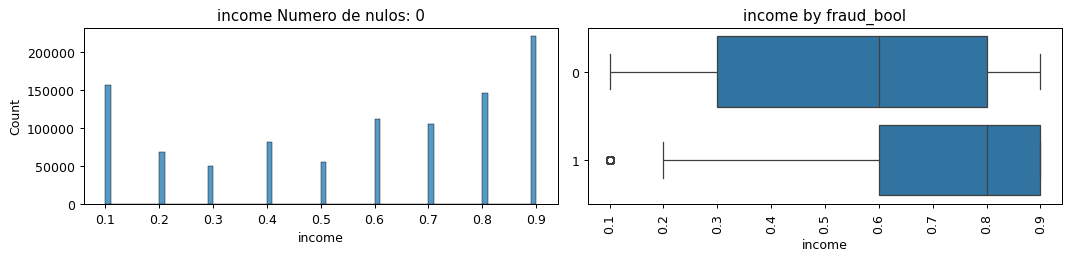

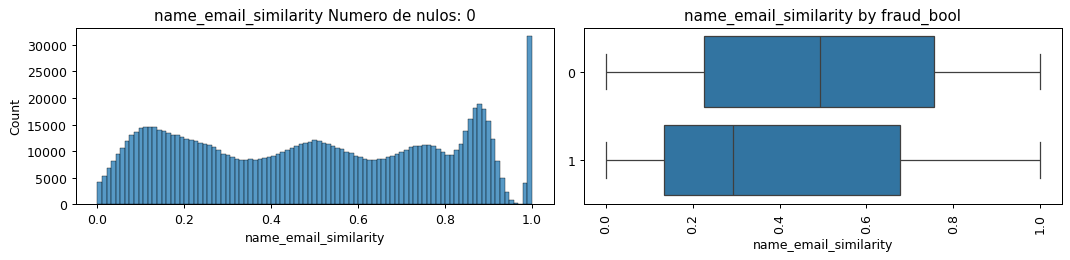

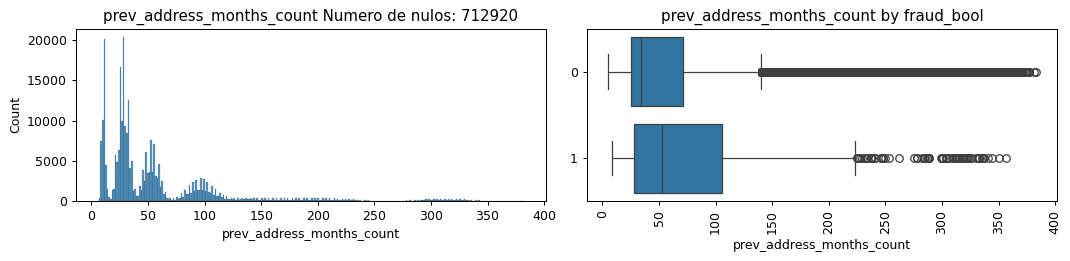

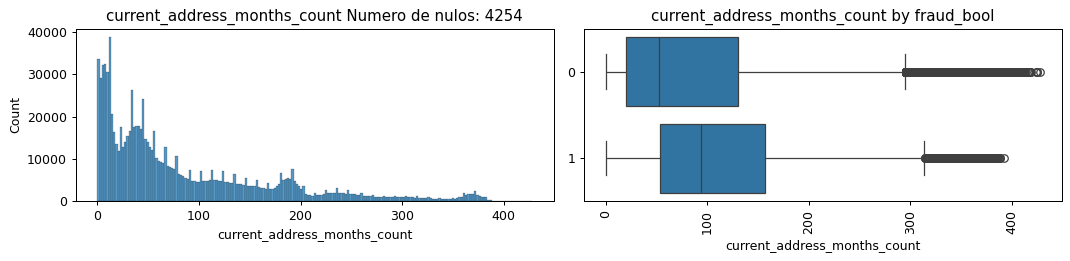

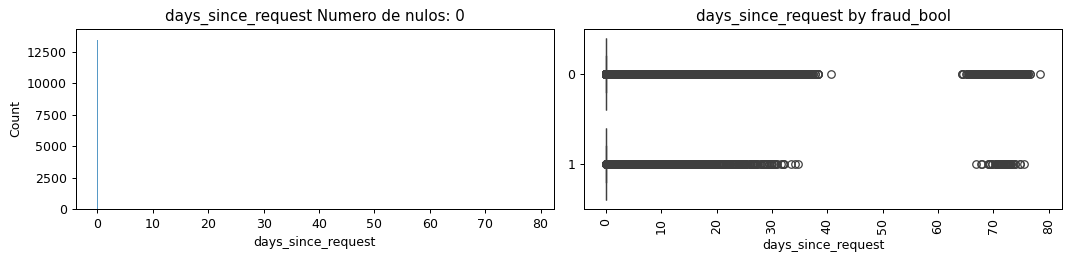

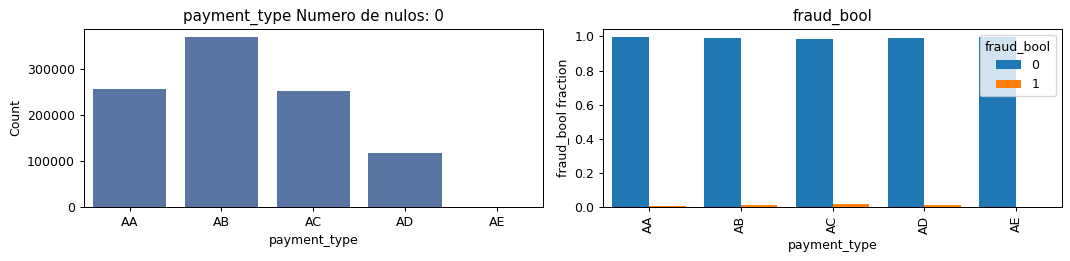

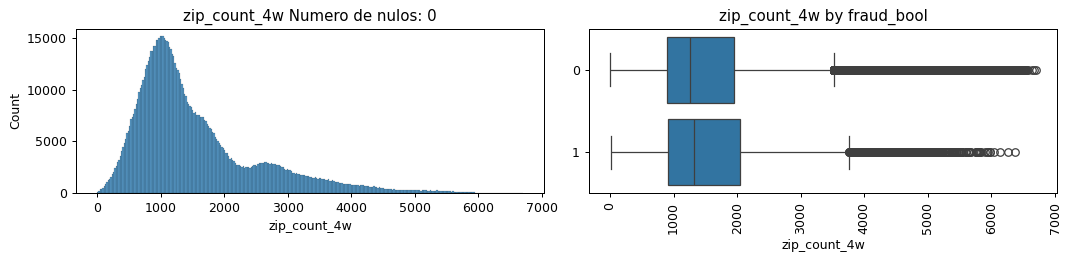

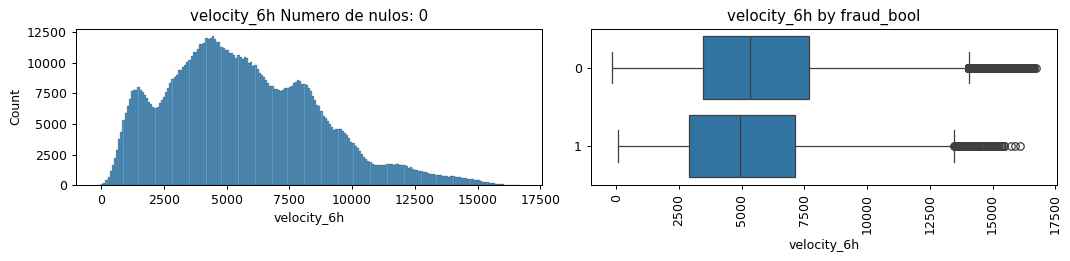

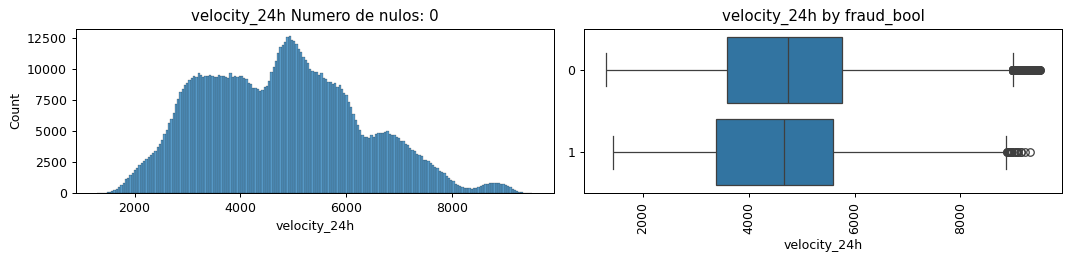

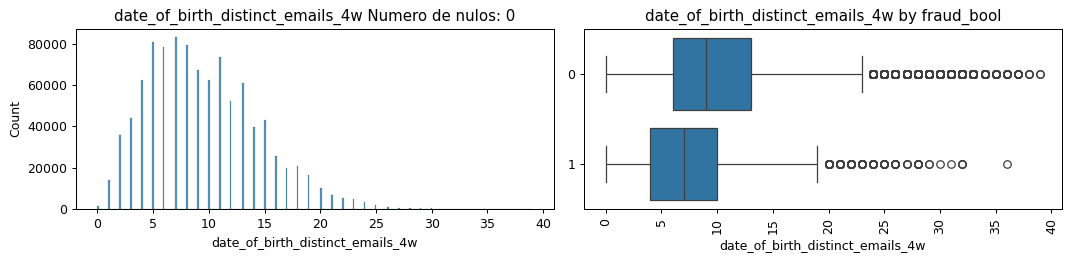

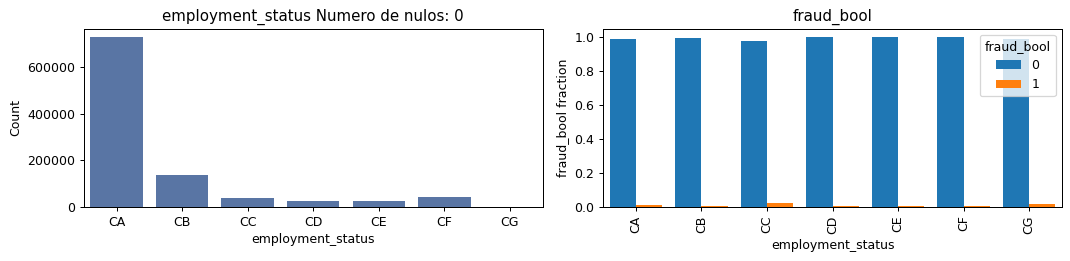

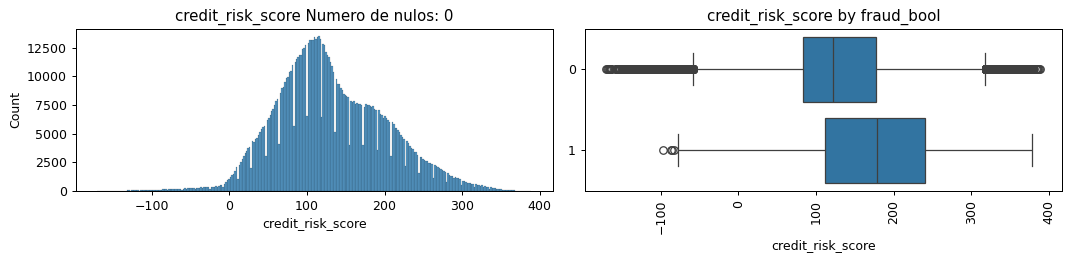

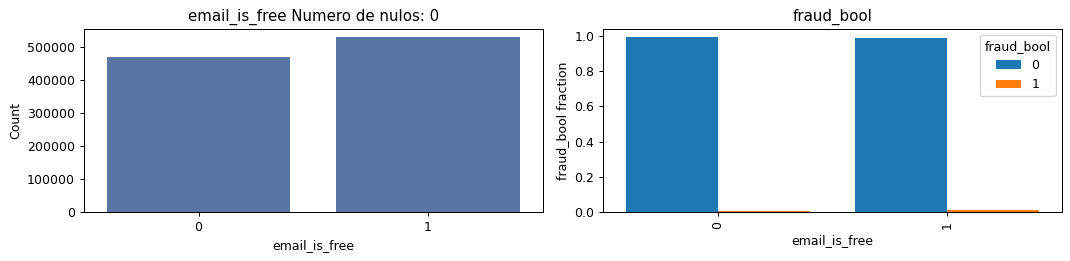

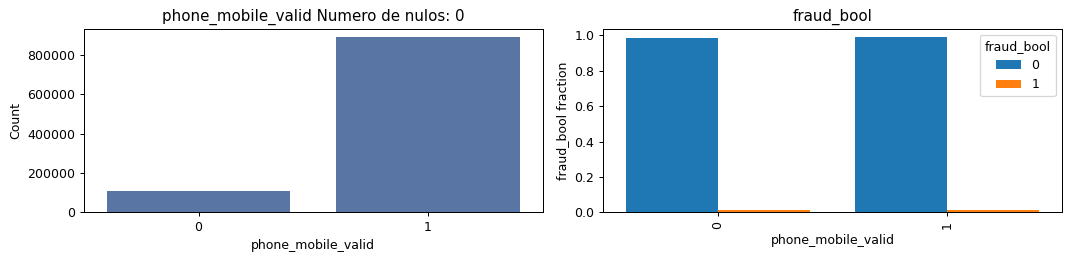

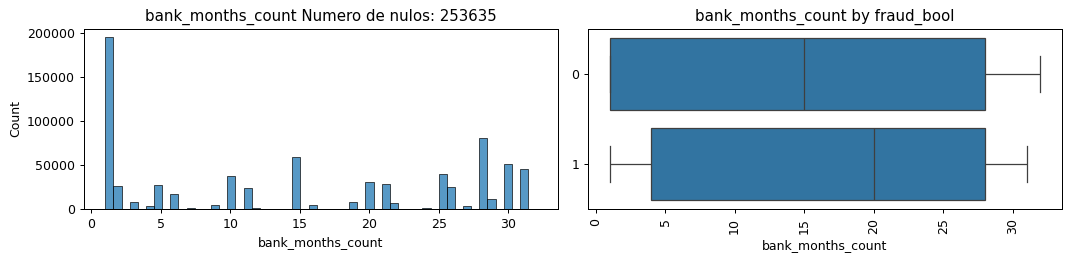

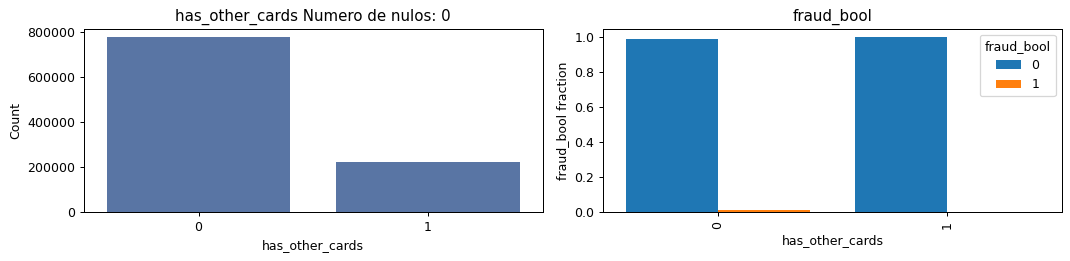

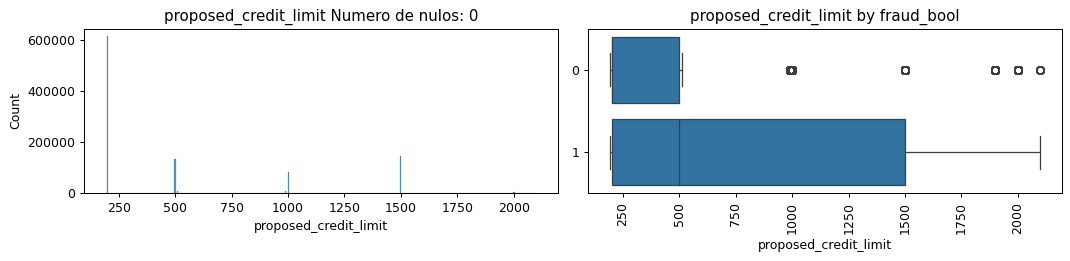

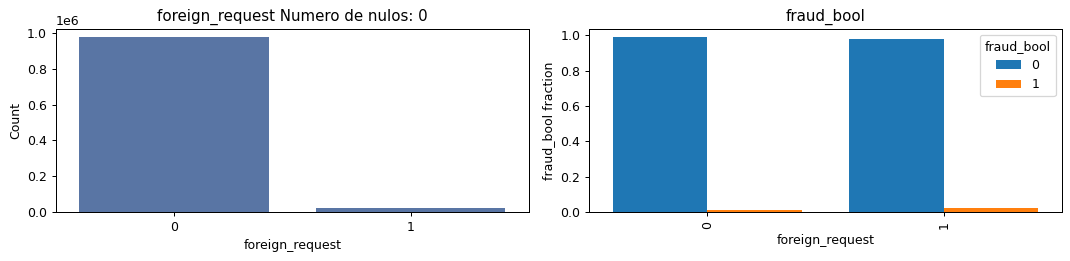

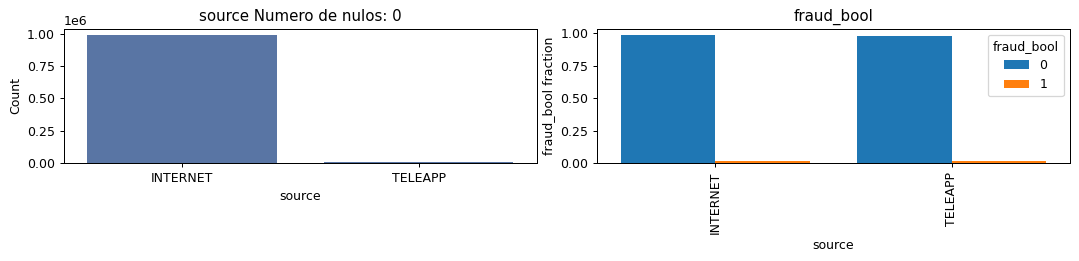

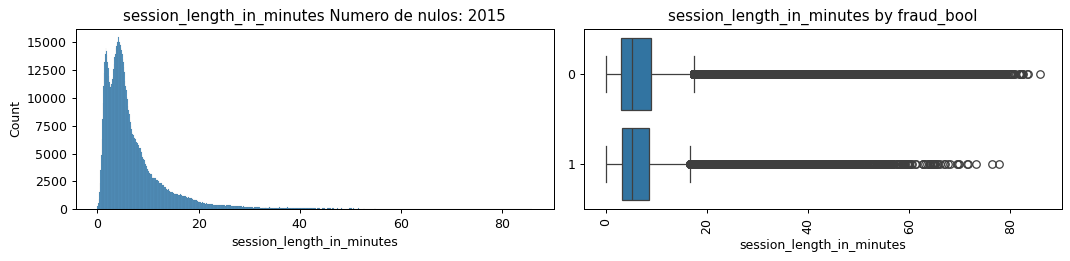

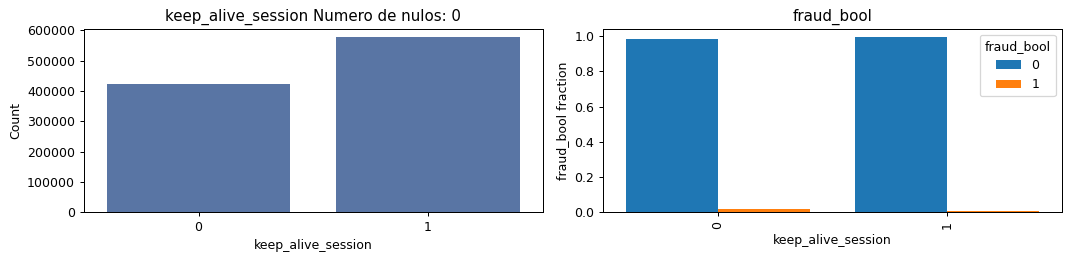

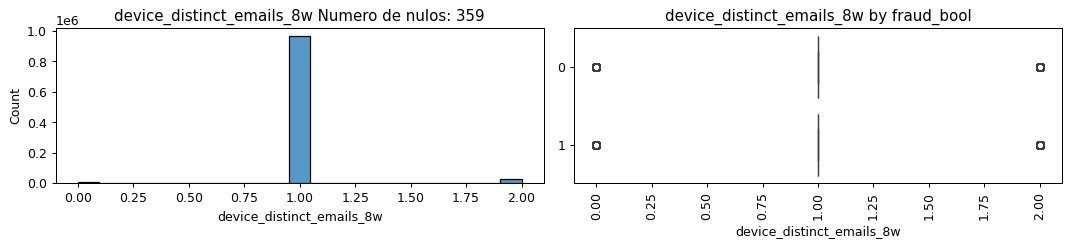

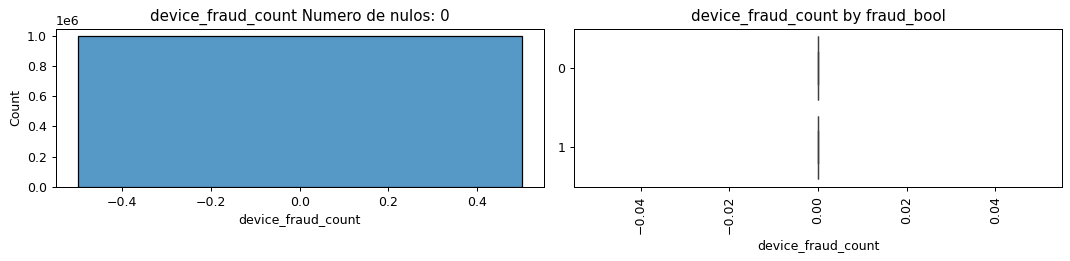

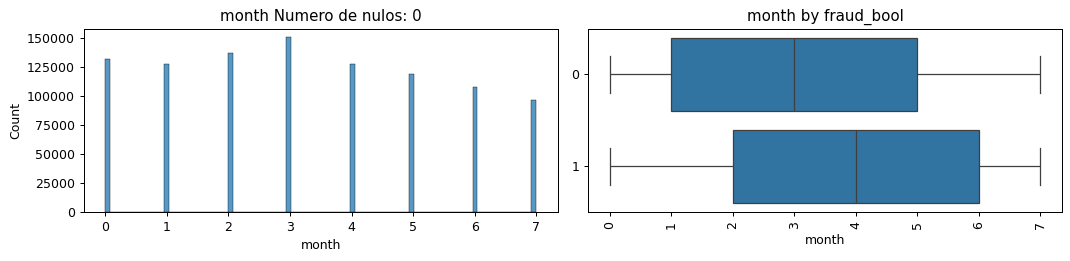

In [19]:
# Iterate over each column in the DataFrame
for i in list(pd_fraud.columns):
    # Check if the column is numeric and not the target variable ('fraud_bool')
    if (pd.api.types.is_numeric_dtype(pd_fraud[i])) and (i != 'fraud_bool'):
        # If numeric, plot the feature using a function (plot_feature) for continuous variables
        plot_feature(pd_fraud, col_name=i, isContinuous=True, target='fraud_bool')
    # If the column is not numeric and not the target variable, plot the feature for categorical variables
    elif i != 'fraud_bool':
        plot_feature(pd_fraud, col_name=i, isContinuous=False, target='fraud_bool')


Una vez visualizada la distribución de variables y su relación con la variable objetivo "fraud_bool" se pueden extraer algunas reflexiones:

· En el primer gráfico de tipo boxplot, se puede apreciar una diferencia en las medianas de "income" entre transacciones fraudulentas y no fraudulentas, la cual es más grande en los casos fraudulentos, sugiriendo la posibilidad de que cuentas con ingresos más elevados tiendan a estar asociadas con transacciones fraudulentas.

· Según el gráfico de barras para la variable "name_email_similarity" parece que hay una concentración de valores en los extremos del rango de la variable, especialmente un pico perfectamente apreciable cerca del valor 1.0. Esto puede dar a entender que una cantidad significativa de usuarios tiene una alta similitud entre su nombre y su dirección de correo electrónico, indicando que incluyen su nombre en la dirección de correo electrónico.

Sin embargo, aunque el pico se halle cerca del valor 1.0 lo que sugiere una similitud elevada entre los nombres y las direcciones de correo electrónico, se necesitaría mayor información para confirmar que la mayoría de los usuarios incluyen su nombre en la dirección de correo electrónico.

En el boxplot correspondiente a esta variable se observan cierta diferencia, indicando que es probable que la presencia del nombre en el correo electrónico esté relacionada con una menor probabilidad de que una aplicación sea fraudulenta.

· Al analizar los bigotes del boxplot asociado a la variable "prev_address_months_count", se destaca que, se puede inferir que existe una cantidad significativa de valores atípicos en ambas categorías, especialmente en las aplicaciones no fraudulentas (clase 0), dado el gran número de puntos fuera de los bigotes. La presencia de estos valores atípicos podría ser indicativa de que dicha variable tiene un comportamiento diferente en las aplicaciones fraudulentas en comparación con las no fraudulentas y, por lo tanto, podría considerarse para la detección de fraude.

· El gráfico de barras de la variable "customer_age" revela que las cuentas de personas de edad avanzada son utilizadas con mayor frecuencia para generar aplicaciones fraudulentas, lo cual se traduce en un dato relevante.

· En el contexto de la variable "days_since_request", los outliers podrían representar casos inusuales que aún son válidos, como, por ejemplo, solicitudes que son mucho más antiguas que la mayoría. Para determinar de verdad si estos valores extremos reflejan errores o anomalías, sería conveniente realizar un análisis más detallado de los datos y del contexto en el que se recopilaron.

· En el gráfico de la variable "intended_balcon_amount" se observa que la introducción de dinero al iniciar una aplicación es una práctica poco común. Dada la similitud de los gráficos boxplot, se infiere que esta variable puede carecer de utilidad para el análisis.

· A pesar de que el histograma de "employment_status" destaca la frecuencia de la categoría CA, el gráfico de barras revela que las categorías CE, CF y, especialmente, CG, aunque por una ligera diferencia, son más propensas a utilizarse en la creación de aplicaciones fraudulentas.

· A pesar de que el histograma de la variable "housing_status" muestra una predominancia de la categoría "BC", el gráfico de barras indica que la categoría "housing_status" "BA" tiende a asociarse más con aplicaciones fraudulentas.

· Respecto a la variable "bank_months_account", vemos una mayor presencia de cuentas anteriores con antigüedades superiores a los 25 meses y también aquellas mas recientes con menos de 5 meses de antigüedad. Si atendemos al boxplot se observa que para ambas clases se abarca practicamente la totalidad de los valores, sin embargo en las aplicaciones no fraudulentas vemos una distribución mas simétrica mientras que en las fraudulentas existe una mayor concentración en la parte alta ubicándose la mediana en el valor 20.

· El boxplot de la variable "proposed_credit_limit" sugiere que las aplicaciones fraudulentas tienden a crearse con límites de crédito más altos, lo cual tiene su razón de ser en el hecho de que lo que se pretende es adquirir confianza.

Siguiendo con esta variable, resulta interesante analizar el salto considerable en el número de personas que solicitan un "proposed_credit_limit" de 0 a 250. Esto sugiere que hay una cantidad importante de personas que están buscando crédito pero que, por alguna razón, no solicitan una cantidad de crédito significativa. Esto podría ser el resultado de factores como preocupaciones de ahorro, condiciones económicas difíciles o miedo al endeudamiento.

A medida que aumenta "proposed_credit_limit", la concentración de personas disminuye. Lo cual sugiere que, a medida que los montantes de crédito propuestos aumentan, se convierte en menos común que las personas soliciten grandes cantidades de crédito. Esto podría deberse a políticas crediticias que restringen el acceso al crédito o de preocupaciones sobre el uso inadecuado del crédito.

· El histograma de la variable "foreign_request" demuestra una baja frecuencia de cuentas iguales a 1, mientras que, por otra parte, el gráfico de barras indica una ligera diferencia. Cuentas de esta tipología podrían ser aprovechadas para crear aplicaciones fraudulentas.

·En relación con la variable "keep_alive_session", dado que el gráfico de la derecha muestra una pequeña fracción naranja en comparación con la barra azul para la "clase 1", esto puede interpretarse como que una proporción relativamente menor de las sesiones que se mantienen activas ("keep_alive_session" = 1) están asociadas con aplicaciones fraudulentas.

· Es plausible que las aplicaciones fraudulentas se originen desde el mismo dispositivo, lo que podría explicar que en el gráfico de barras de "device_distinct_emails_8w", el valor más frecuente sea 1.
Sin embargo, no necesariamente implica que todas las aplicaciones fraudulentas se originen desde el mismo dispositivo, ya que es posible que algunas aplicaciones fraudulentas involucren más de uno o dos dispositivos.

· Respecto a la variable "has_other_cards", es posible observar un conteo significativamente mayor para "0" en comparación con "1", lo que sugiere que la mayoría de los registros en este conjunto de datos corresponden a individuos o entidades que no tienen otras tarjetas.
Por otro lado, el gráfico de la derecha indica que la proporción de registros fraudulentos es mayor en los individuos que no disponen de otras tarjetas en la entidad.

· Centrándonos en la variable "email_is_free", el primer gráfico muestra un conteo con dos posibles valores: "0" (probablemente dando a entender, por ejemplo, que el correo electrónico no es de un proveedor gratuito) y "1" (indicando que es de un proveedor gratuito). Se puede observar que la cantidad de registros con "1" es ligeramente superior a la de "0", lo que se traduce en que hay más registros en el dataset que utilizan un correo electrónico de un proveedor gratuito.
En cuanto al gráfico de la derecha, vemos mayor presencia de fraude para la clase 1.

· En cuanto a "payment_type", el primer gráfico muestra un conteo de registros por tipo de pago, representado por las categorías "AA", "AB", "AC", "AD", y "AE". Podemos observar que "AB" es el tipo de pago con más registros, seguido por "AA", "AC".
Ahora bien, el segundo gráfico muestra que para ciertas categorías existe mayor proporción de fraude como el caso de "AC".


### Outliers, correlaciones y distribución valores missing

Finalmente, en esta parte:

- Identificamos valores atípicos.
- Calculamos y visualizamos las correlaciones entre las variables del dataset a través de una matriz.
- Examinamos la distribución de los valores faltantes en relación con la variable objetivo.

#### Outliers

In [20]:
# Use a function (get_deviation_of_mean_perc) to calculate the deviation of mean percentages for continuous variables
# in the DataFrame pd_fraud with respect to the target variable 'fraud_bool'
get_deviation_of_mean_perc(pd_fraud, list_continuous_variables, target='fraud_bool', multiplier=3)

no_fraud     fraud                          variable  sum_outlier_values  \
0   0.993385  0.006615         prev_address_months_count                8617   
1   0.984085  0.015915      current_address_months_count               21175   
2   0.958048  0.041952                      customer_age                7890   
3   0.988242  0.011758                days_since_request               17775   
4   0.989583  0.010417            intended_balcon_amount                2016   
5   0.990644  0.009356                      zip_count_4w               16247   
6   0.993550  0.006450                       velocity_6h                4341   
7   0.996289  0.003711                      velocity_24h                 539   
8   0.989654  0.010346              bank_branch_count_8w               40984   
9   0.993608  0.006392  date_of_birth_distinct_emails_4w                6258   
10  0.967445  0.032555                 credit_risk_score                3471   
11  0.870349  0.129651             proposed_credit_limit                6155   
12  0.979933  0.020067         session_length_in_minutes               23571   
13  0.962437  0.037563         device_distinct_emails_8w               31574   

    porcentaje_sum_outlier_values  
0                        0.008617  
1                        0.021175  
2                        0.007890  
3                        0.017775  
4                        0.002016  
5                        0.016247  
6                        0.004341  
7                        0.000539  
8                        0.040984  
9                        0.006258  
10                       0.003471  
11                       0.006155  
12                       0.023571  
13                       0.031574

Para analizar los outliers extraemos una tabla con el número de outliers (media+3std o media-3std), la variable a la que pertenecen, la proporcion y la distribución en base a nuestra variable target.

En cuanto a la distribución de outliers vemos que para muchas variables la distribución entre fraude y no fraude es muy similar a la del total del dataset, pero existen ciertas variables donde vemos que los outliers están sobrerrepresentados en la categoría de fraude como son el proposed_credit_limit y en menor medida el customer_age.

#### Correlaciones

In [21]:
# Use a function (get_corr_matrix) to calculate and visualize the correlation matrix for continuous variables
# in the DataFrame pd_fraud, using the Pearson correlation method and specifying the size of the figure
get_corr_matrix(dataset=pd_fraud[list_continuous_variables], method='pearson', size_figure=[10, 8])

0

En la presente matriz de confusión se reflejan los coeficientes de correlación entre variables. En el contexto del dataset que nos ocupa resulta de gran ayuda para tratar e entender las relaciones entre diferentes características de los solicitantes y la solicitud de apertura de cuenta, y cómo tales características pueden guardar o no relación con la probabilidad de fraude.

Cada celda de dicha matriz muestra el coeficiente de correlación entre dos variables. Los valores de correlación varían entre -1 y 1.

- Un valor cercano a 1 implica una fuerte correlación positiva: cuando una variable aumenta, la otra también lo hace.
- Un valor cercano a -1 implica una fuerte correlación negativa: cuando una variable aumenta, la otra disminuye.
- Un valor cercano a 0 implica que no hay una correlación lineal entre las variables.

A simple vista vemos que no exite un gran cantidad decorrelaciones altas entre variables, pues se puede intuir por la falta de celdas con colores que representan valores extremos cercanos a 1 o -1.

Algunas variables tienen una correlación leve con otras. Por ejemplo, las variables "velocity_6h", "velocity_24h" y "velocity_4w" parecen tener una correlación negativa leve con otras variables. Y una correlación negativa de mayor intensidad entre ellas mismas.

Por otro lado, la mayoría de las variables parecen tener correlaciones muy débiles entre sí, lo que se ve por el predominio del color que representa el valor 0 en la escala de la parte derecha.

Cabe destacar que la correlación de "device_fraud_count" siempre es indefinida, ya que se trata de una constante.

La correlación entre las variables "customer_age" y "date_of_birth_distinct_emails_4w" parece ser negativa, aunque no es extremadamente fuerte. Esto se puede ver en la celda donde se produce la intersección entre ambas variables, donde el color indica el grado de correlación.
Tal y como se mencionaba anteriormente, una correlación negativa significa que a medida que una variable aumenta, la otra tiende a disminuir.

En este contexto, un valor negativo podría indicar que a medida que aumenta la edad del cliente, hay una tendencia a tener menos correos electrónicos distintos asociados a su fecha de nacimiento registrados en las últimas 4 semanas.
Sin embargo, la correlación no parece ser muy fuerte (el color no es muy intenso). Esto sugiere que la relación entre la edad del cliente y el número de correos electrónicos distintos no es lineal o que hay otros factores que también influyen en esta relación.

In [22]:
# Calculate the Pearson correlation matrix for the specified continuous variables in the DataFrame pd_fraud
corr = pd_fraud[list_continuous_variables].corr('pearson')

# Create a new DataFrame containing the absolute values of the lower triangular part of the correlation matrix
new_corr = corr.abs()
new_corr.loc[:, :] = np.tril(new_corr, k=-1)

# Stack the lower triangular part of the correlation matrix into a DataFrame with columns 'correlation' and indices
new_corr = new_corr.stack().to_frame('correlation').reset_index()

# Sort the DataFrame by the 'correlation' column in descending order
new_corr = new_corr.sort_values(by='correlation', ascending=False)

# Filter the DataFrame to include only correlations greater than 0.6
high_corr_df = new_corr[new_corr['correlation'] > 0.6]

La correlación entre las variables "month" y "velocity_4w" es significativamente alta, con un coeficiente de aproximadamente 0.848. Sin embargo, cabe destacar que la correlación entre estas dos variables es negativa, lo cual indica que, a medida que el valor de una variable aumenta, el valor de la otra tiende a disminuir y viceversa.

En el contexto del dataset que nos concierne, una correlación negativa fuerte podría sugerir que hay una tendencia de que la cantidad de transacciones en las últimas cuatro semanas ("velocity_4w") disminuya a medida que aumenta el número del mes ("month"). Esto se podría interpretar como un indicador de comportamiento anómalo o posiblemente fraudulento, pues es de esperar que la actividad de la cuenta se mantenga relativamente constante o no muestre una tendencia fuerte relacionada con el tiempo transcurrido desde la apertura de la cuenta.

Por otro lado, la correlación entre "proposed_credit_limit" y "credit_risk_score" es positiva y también significativa, aunque más moderada. Según esta correlación parece ser que, por lo general, a los solicitantes con una puntuación de riesgo crediticio más alta se les ofrece un límite de crédito mayor. Dicho lo cual tiene sentido desde una perspectiva de gestión de riesgos, ya que los clientes con una mejor puntuación de riesgo suelen ser considerados menos propensos a incurrir en comportamientos fraudulentos o incumplir sus obligaciones financieras.

#### Distribución de nulos

In [23]:
# Use a function (get_percent_null_values_target) to calculate the percentage of null values for continuous variables
# in the DataFrame pd_fraud with respect to the target variable 'fraud_bool'
get_percent_null_values_target(pd_fraud, list_continuous_variables, target='fraud_bool')

no_fraud     fraud                      variable  sum_null_values  \
0  0.986873  0.013127        intended_balcon_amount           742523   
1  0.985785  0.014215     prev_address_months_count           712920   
2  0.983677  0.016323             bank_months_count           253635   
3  0.996709  0.003291  current_address_months_count             4254   
4  0.991067  0.008933     session_length_in_minutes             2015   
5  0.988858  0.011142     device_distinct_emails_8w              359   

   porcentaje_sum_null_values  
0                    0.742523  
1                    0.712920  
2                    0.253635  
3                    0.004254  
4                    0.002015  
5                    0.000359

Una vez vistos la cantidad de nulos y a que variables pertenecen como hemos visto anteriomente, también queremos realizar un análisis de la distribución en base a nuestra variable objetivo, de esta manera conoceremos si los nulos aportan información y dan indicios sobre la existencia de fraude o no.

Analizando la distribución se puede observar que en todas las variables se presenta una distribución similar a la muestra total, sí existe mayor diferencia para bank_months_count y current_address_months_counts donde la distribución se aleja ligeramente de la distribución general entre fraude y no fraude.

In [24]:
# We save the file as a pickle since we want to maintain the structure for the second notebook
pd_fraud.to_pickle('../data/eda.pkl')